<a href="https://colab.research.google.com/github/mobarakol/tutorial_notebooks/blob/main/MRI_slicing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Downgrade gdown

In [ ]:
!pip -q install nibabel gdown==4.6.0

# Please Restart Session for gdown to reload the downgraded version
Download MRI dataset

In [6]:
import gdown
url = 'https://drive.google.com/uc?id=1zcvnBscFVI2v5ieAlGGnp0zpX8WmIrD4'
gdown.download(url,'endonasal_mri_patients.zip',quiet=True)
!unzip -r endonasal_mri_patients.zip
!rm -rf /content/endonasal_mri_patients/.DS_Store
!rm -rf /content/endonasal_mri_patients/**/.DS_Store

'endonasal_mri_patients.zip'

(512, 512, 114) (512, 512, 114)
Unique label: [0. 1. 2.]


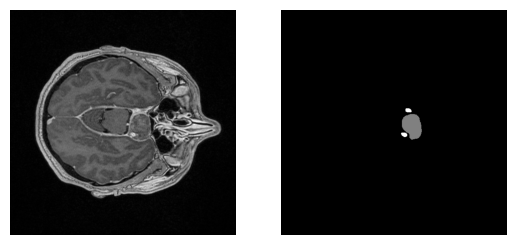

In [19]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

img = nib.load('/content/endonasal_mri_patients/mri0066/mri0066_t1c.nii.gz')
mask = nib.load('/content/endonasal_mri_patients/mri0066/mri0066_mask.nii.gz')
img_slice = img.get_fdata()
mask_slice = mask.get_fdata()
print(img_slice.shape, mask_slice.shape)
print('Unique label:', np.unique(mask_slice))

plt.subplot(121), plt.imshow(img_slice[:,:,40], cmap='gray')
plt.axis('OFF')
plt.subplot(122), plt.imshow(mask_slice[:,:,40], cmap='gray')
plt.axis('OFF');

Slice all using Nibabel: V1

In [54]:
import os
import nibabel as nib
import numpy as np
import cv2

def slice_nifti_endonasal(input_folder: str) -> None:
    """
    This function takes a folder of NIfTI MRI files, extracts 2D axial slices from each 3D volume,
    and saves them as PNG images in a new folder.

    Parameters:
    - input_folder (str): The path to the folder containing the NIfTI folders.
    """

    # Define patient MRI IDs and file types
    patient_ids = ["153", "155", "167", "170", "169", "154", "164", "151", "152", "066"]
    file_types = ["t1c", "masks"]

    # Create output folders for each file type
    output_folders = {file_type: f"axial_{file_type}_slices" for file_type in file_types}
    for folder in output_folders.values():
        if not os.path.exists(folder):
            os.makedirs(folder)

    # Loop through all folders in the input folder
    for folder in os.listdir(input_folder):

        full_folder_path = os.path.join(input_folder, folder)

        print("Contents of ", full_folder_path, ": ", os.listdir(full_folder_path))

        # Process each file in the patient folder
        for filename in os.listdir(full_folder_path):
            print("Found file:", filename)
            filepath = os.path.join(full_folder_path, filename)

            # Determine the type of file and set the output folder
            if "t1c" in filename:
                output_folder = output_folders["t1c"]
            elif "mask" in filename:
                output_folder = output_folders["masks"]
            else:
                continue  # Skip files that don't match the pattern

            image = nib.load(filepath)
            array = image.get_fdata()

            # Save each slice as a PNG image
            for z in range(array.shape[2]):
                normalized_slice = np.rot90(array[:, :, z])
                if "t1c" in filename:
                    normalized_slice = cv2.normalize(normalized_slice, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
                output_filename = os.path.join(output_folder, f"{folder}_slice{z}.png")
                cv2.imwrite(output_filename, normalized_slice)
                # if z==40:
                #     print(filename, np.unique(normalized_slice))


    print(f"Completed slicing. T1c slices have been saved to {output_folders['t1c']}.")
    print(f"Completed slicing. Segmentation slices have been saved to {output_folders['masks']}.")

# Example usage
if __name__ == "__main__":
    folder_path = '/content/endonasal_mri_patients'
    os.makedirs('endonasal_mri_slices', exist_ok = True)
    slice_nifti_endonasal(folder_path)

Contents of  /content/endonasal_mri_patients/mri0066 :  ['mri0066_mask.nii.gz', 'mri0066_t1c.nii.gz']
Found file: mri0066_mask.nii.gz
Found file: mri0066_t1c.nii.gz
Contents of  /content/endonasal_mri_patients/mri0151 :  ['mri0151_t1c.nii.gz', 'mri0151_mask.nii.gz']
Found file: mri0151_t1c.nii.gz
Found file: mri0151_mask.nii.gz
Contents of  /content/endonasal_mri_patients/mri0153 :  ['mri0153_mask.nii.gz', 'mri0153_t1c.nii.gz']
Found file: mri0153_mask.nii.gz
Found file: mri0153_t1c.nii.gz
Contents of  /content/endonasal_mri_patients/mri0155 :  ['mri0155_t1c.nii.gz', 'mri0155_mask.nii.gz']
Found file: mri0155_t1c.nii.gz
Found file: mri0155_mask.nii.gz
Contents of  /content/endonasal_mri_patients/mri0169 :  ['mri0169_mask.nii.gz', 'mri0169_t1c.nii.gz']
Found file: mri0169_mask.nii.gz
Found file: mri0169_t1c.nii.gz
Contents of  /content/endonasal_mri_patients/mri0154 :  ['mri0154_mask.nii.gz', 'mri0154_t1c.nii.gz']
Found file: mri0154_mask.nii.gz
Found file: mri0154_t1c.nii.gz
Contents o

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 244 245 246 24

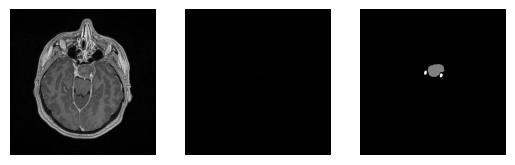

In [57]:
img = cv2.imread('/content/axial_t1c_slices/mri0066_slice40.png')
mask = cv2.imread('/content/axial_masks_slices/mri0066_slice40.png')
print(np.unique(img), np.unique(mask))

plt.subplot(131), plt.imshow(img, cmap='gray')
plt.axis('OFF')
plt.subplot(132), plt.imshow(mask, cmap='gray')
plt.axis('OFF');
mask[mask==1] = 127
mask[mask==2] = 255
plt.subplot(133), plt.imshow(mask, cmap='gray')
plt.axis('OFF');